<center><h2>Prediction using Supervised ML</h2></center>

<h4>Linear Regression</h4>

In [1]:
#libraries to be used
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv("Student.csv") #feed data
df.head(5)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [3]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


<h4>Find Missing Values </h4>

In [4]:
missing_data = df.isnull()
missing_data.head(5)

,Hours,Scores
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False


In [5]:
for col in missing_data.columns.values.tolist():
    print(col)
    print (missing_data[col].value_counts())
    print("")
    

Hours
False    25
Name: Hours, dtype: int64

Scores
False    25
Name: Scores, dtype: int64



<h4>Visualizing Data </h4>

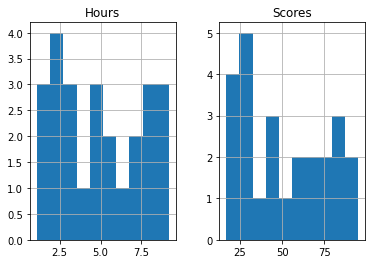

In [6]:
df.hist() #Histogram to check the data
plt.show()

In [7]:
df.corr() #find correlation

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


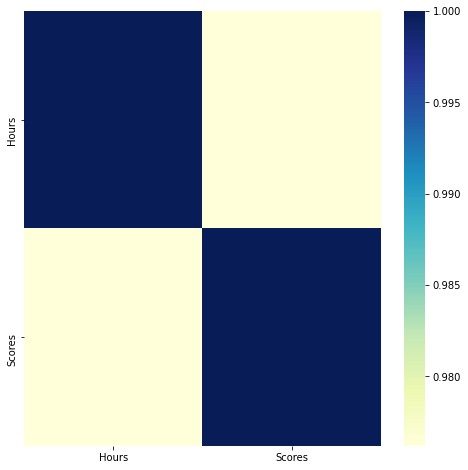

In [8]:
plt.figure(figsize=(8,8))
sns.heatmap(df.corr(),cmap='YlGnBu') #visualise the correlation
plt.show()

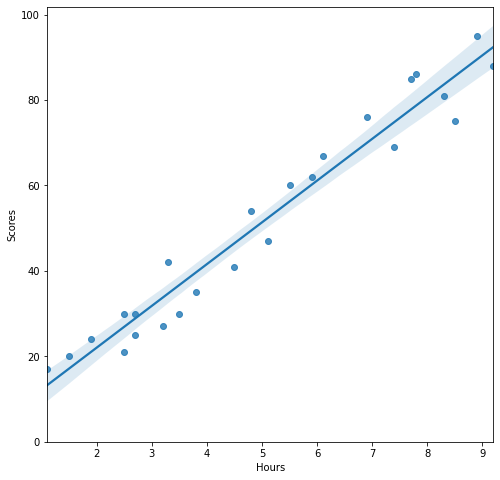

In [9]:
plt.figure(figsize=(8,8))
sns.regplot(x='Hours',y='Scores',data=df) #to find the type of correlation
plt.ylim(0,)
plt.show()

<b> From the Regression plot we can see that the hours and score is postively correlated </b>

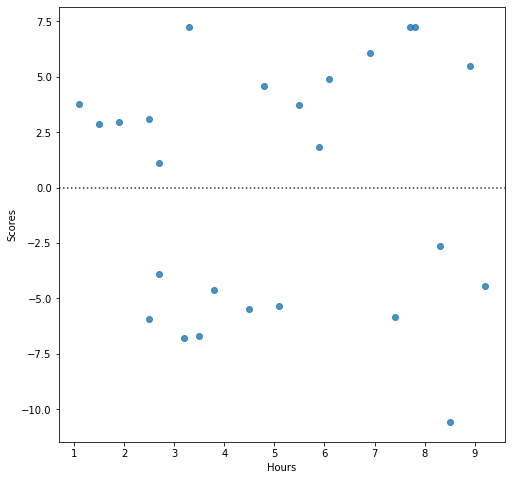

In [10]:
plt.figure(figsize=(8,8))
sns.residplot(x=df['Hours'],y=df['Scores']) #to verify the spread of data
plt.show()

<b> From the plot it is clear that the data is spread randomly and no significant pattern is found. </b>

<h4>Split Data and Train Model </h4>

In [11]:
from sklearn.model_selection import train_test_split

X = df.iloc[:, :-1].values  
y = df.iloc[:, 1].values 
train_x,test_x,train_y,test_y = train_test_split(X,y,test_size=0.2,random_state=0) #split dataset
print('Train Set Size:',train_x.shape[0])
print('Test Set Size:',test_x.shape[0])

Train Set Size: 20
Test Set Size: 5


In [12]:
from sklearn.linear_model import LinearRegression

lr=LinearRegression()
lr.fit(train_x,train_y) 
print('Training Complete')

Training Complete


In [13]:
yhat = lr.predict(test_x)
pd.DataFrame({'Actual':test_y, 'Predict':yhat})

,Actual,Predict
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [14]:
#Coefficients
print ('Coefficients: ', lr.coef_)
print ('Intercept: ',lr.intercept_)

Coefficients:  [9.91065648]
Intercept:  2.0181600414346974


<h4> Validation and Prediction </h4>

In [15]:
from sklearn.metrics import r2_score,mean_absolute_error

print('R2 Score:.%2f'% r2_score(test_y,yhat))
print('MSE :',mean_absolute_error(test_y,yhat))

R2 Score:.0.945491
MSE : 4.183859899002975


In [16]:
hour=[[9.25]]
y_hour=lr.predict(hour)

In [17]:
print('Student score 9.25 hours is: %.2f' %y_hour)

Student score 9.25 hours is: 93.69
